# Kaggle Titanic Competition Data Exploration
## By Julien Dhouti

The data used for analysis in this notebook is from the dataframe **train_edited.csv** which was cleaned by Tomas Bencomo. Further description about how the file was cleaned can be found in his notebook.

In [2]:
# Import necessary libraries
library(ggplot2)

# import the data
df <- read.csv('../datasets/train_edited.csv')
head(df)
str(df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,29.69912,0,0,330877,8.4583,Q


'data.frame':	889 obs. of  11 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 889 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 558 519 628 416 580 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 680 levels "110152","110413",..: 523 596 669 49 472 275 85 395 344 132 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...


#### Lets begin by analyzing the relationship between age and fare.
We looked at the top 38 most expensive fares and tried to see if there was any correlation with age.
To find these fares, we only analyzed the fares that were 2 standard deviations above the mean. The amount of tickets that matched this description was 38 tickets.

In [3]:
standard_dev <- sd(df$Fare)
two_sd_over <- mean(df$Fare) + 2*standard_dev

In [4]:
fares <- df$Fare[df$Fare > two_sd_over]
ages <- df$Age[df$Fare > two_sd_over]
length(fares)

[1] 38

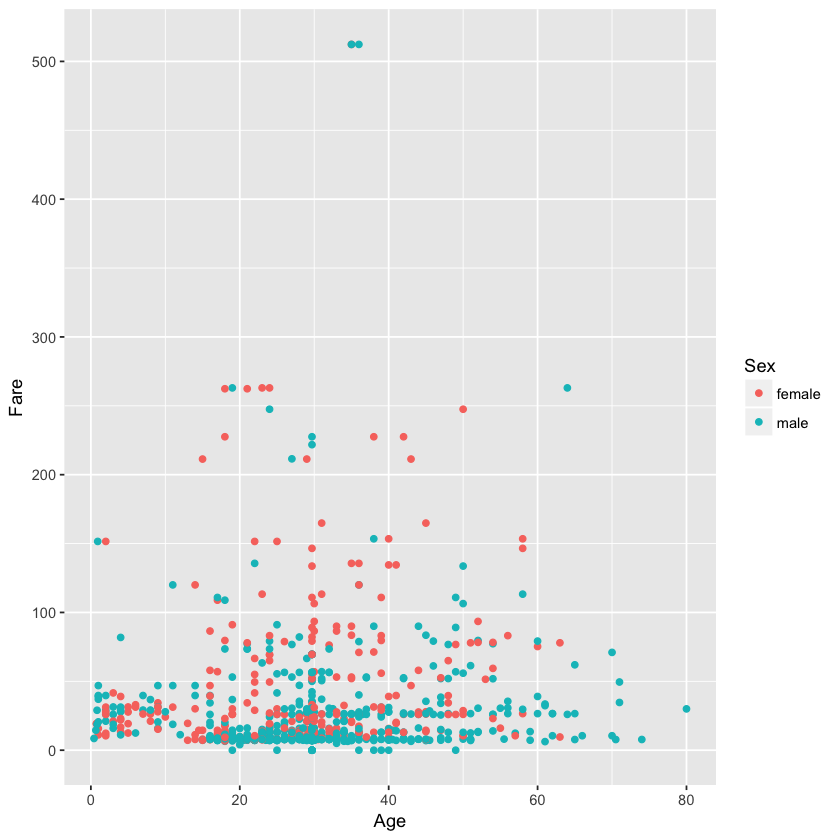

In [5]:
qplot(Age, Fare, data = df, color = Sex)

By the looks of the graph, it doesn't appear that there is much of a correlation between the two variables but to confirm, we could determine the coefficient of correlation.

In [6]:
cor(df$Age, df$Fare)

[1] 0.08860447

Since the coefficient of correlation is not near 1, and much closer to 0, we can assume there is no correlation between the two variables.

#### Analysis: Survival vs. Age

Next, we are going to analyze the surival rate vs. the age of the passenger.

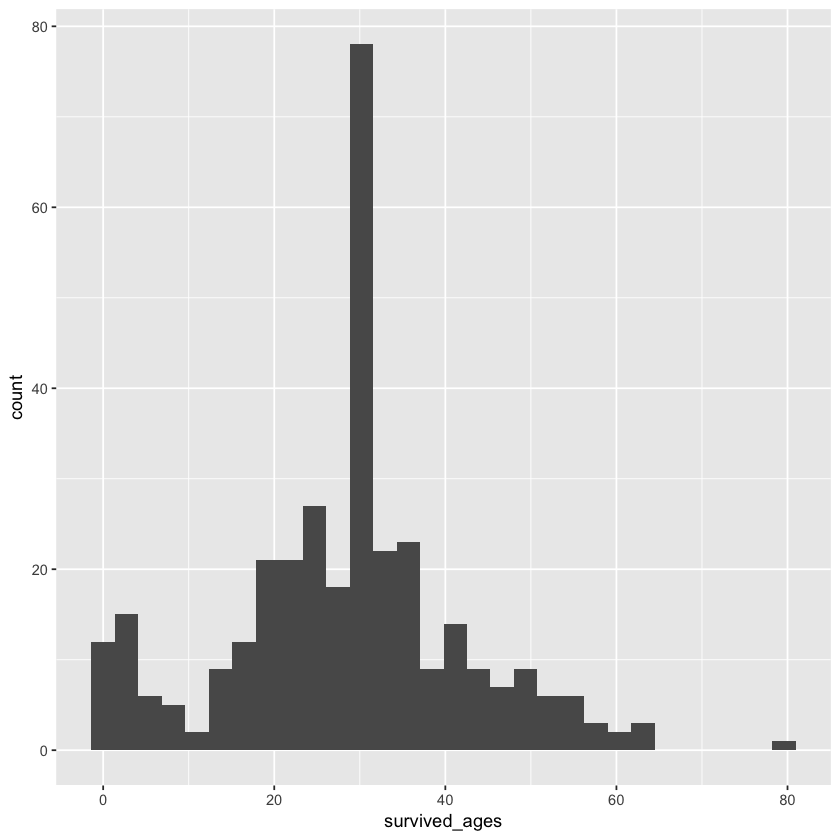

In [9]:
# We can do this by once again generating a plot analysis but by factoring based on survival rate
survived_ages <- df$Age[df$Survived == 1]
qplot(survived_ages, geom="histogram", bins = 30)

From this we can see that the majority of survivers were in between the ages of 20 and 40. This is useless however, unless we know the amount of passengers that were in between each age range.